# **Homework 4**

## **Getting and Cleaning Data**

In [113]:
#Import all the features I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from scipy import stats

Read in the data from .csv and set index as "PassengerId"

In [6]:
data1 = pd.read_csv(r"C:\Users\Miles\Desktop\BYU\Winter 2018\Machine Learning\titanic_train.csv")
data1 = data1.set_index('PassengerId')
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Make dummy variables of Pclass, Sex, and Embarked, which are the three categorical variables in this dataset that I think might influence whether or not the individual survived (I assume name and ticket won't effect survival).
Cabin is another variable that I think can effect survival greatly, but with so many missing values, I'm going to have to deal with that separately.

In [7]:
categories = ['Pclass', 'Sex', 'Embarked']
data1['Pclass'] = data1['Pclass'].astype(str)
data2 = pd.get_dummies(data1[categories])
data2.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,0,1,0,1,0,0,1
2,1,0,0,1,0,1,0,0
3,0,0,1,1,0,0,0,1
4,1,0,0,1,0,0,0,1
5,0,0,1,0,1,0,0,1


Now I will join my dummy variables to the original dataset

In [8]:
data3 = pd.concat([data2, data1], axis=1, join_axes=[data2.index])
data3.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0,0,1,0,1,0,0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,0,0,1,1,0,0,0,1,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,0,0,1,0,0,0,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,0,1,0,1,0,0,1,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now I will drop all the variables that I converted to dummy variables plus the variables that I won't be using (Name, Ticket and Cabin)

In [9]:
data4 = data3.drop(data3.columns[[9, 10, 11, 15, 17, 18]], axis=1)
data4.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,22.0,1,0,7.2500
2,1,0,0,1,0,1,0,0,1,38.0,1,0,71.2833
3,0,0,1,1,0,0,0,1,1,26.0,0,0,7.9250
4,1,0,0,1,0,0,0,1,1,35.0,1,0,53.1000
5,0,0,1,0,1,0,0,1,0,35.0,0,0,8.0500


Now I will fill all the missing values with the mean.  This isn't ideal, but I don't think there's a perfect way to fill missing values, and this should work for my model.

In [10]:
data5 = data4.fillna(data4.mean())
data5.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,22.0,1,0,7.2500
2,1,0,0,1,0,1,0,0,1,38.0,1,0,71.2833
3,0,0,1,1,0,0,0,1,1,26.0,0,0,7.9250
4,1,0,0,1,0,0,0,1,1,35.0,1,0,53.1000
5,0,0,1,0,1,0,0,1,0,35.0,0,0,8.0500


In [11]:
data5["Survived"].mean()

0.3838383838383838

## **Visualize the Data**

I first want to visualize Fare to see what effect it has on survival.

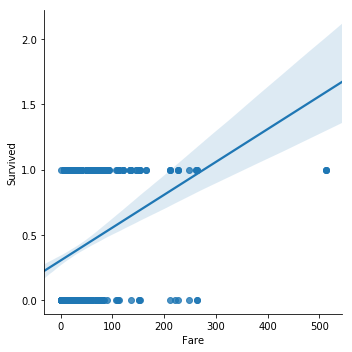

In [12]:
sns.lmplot(x="Fare", y="Survived", data=data5)

There seems to be one outlier, so I will check to see if there's more than one by looking at the max Fare value, drop the max, and then see the new max.

In [175]:
data5.describe()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876,0.486592,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
data6 = data5.loc[data5.Fare != np.max(data5.Fare)]
data6.describe()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.239865,0.207207,0.552928,0.352477,0.647523,0.185811,0.086712,0.725225,0.381757,29.680083,0.524775,0.381757,30.582164
std,0.427241,0.405534,0.497471,0.478011,0.478011,0.389173,0.281571,0.446652,0.486091,13.019819,1.104186,0.806949,41.176366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,263.000000


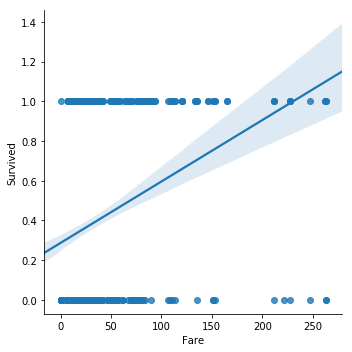

In [178]:
sns.lmplot(x="Fare", y="Survived", data=data6)

This seems much more reasonable, so I will use this data instead and drop the max of the testing dataset as well.

Now I will look at the Embarked variables. Normally, I wouldn't think that where the passenger embarked from would make a difference on survival, but it could have implications of wealth, family size, and where they were located in the ship, so I will take a look at each one and see if there is any correlation.

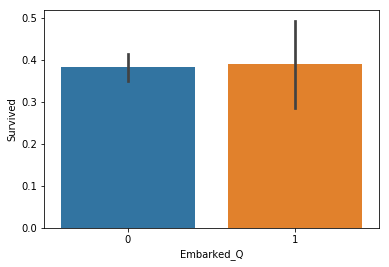

In [13]:
sns.barplot(x="Embarked_Q", y="Survived", data=data5)

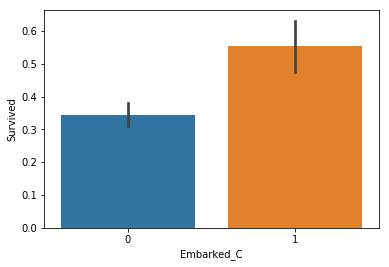

In [14]:
sns.barplot(x="Embarked_C", y="Survived", data=data5)

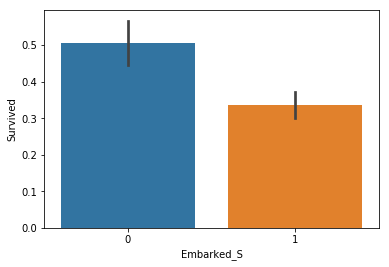

In [15]:
sns.barplot(x="Embarked_S", y="Survived", data=data5)

There seems to be correlation, so I will keep them in my model.

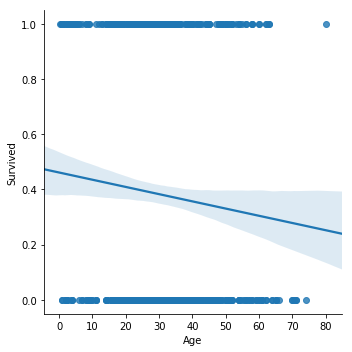

In [16]:
sns.lmplot(x="Age", y="Survived", data=data5)

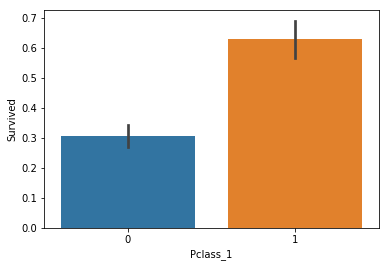

In [17]:
sns.barplot(x="Pclass_1", y="Survived", data=data5)

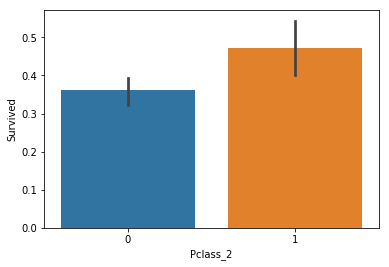

In [18]:
sns.barplot(x="Pclass_2", y="Survived", data=data5)

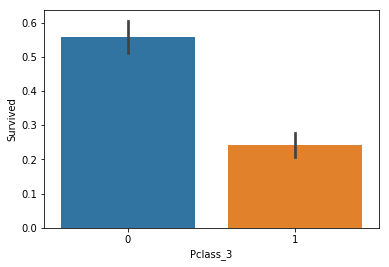

In [19]:
sns.barplot(x="Pclass_3", y="Survived", data=data5)

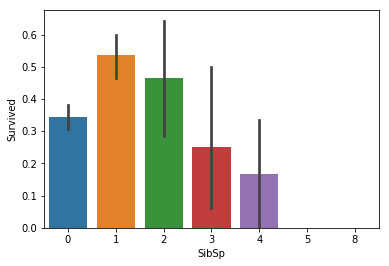

In [20]:
sns.barplot(x="SibSp", y="Survived", data=data5)

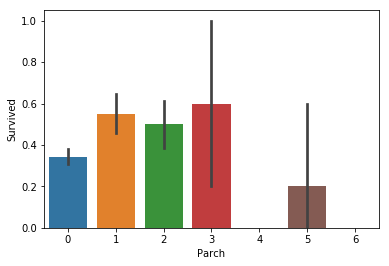

In [21]:
sns.barplot(x="Parch", y="Survived", data=data5)

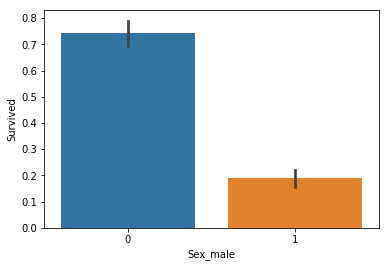

In [22]:
sns.barplot(x="Sex_male", y="Survived", data=data5)

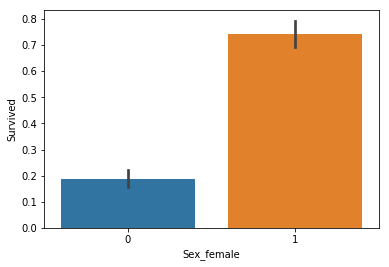

In [23]:
sns.barplot(x="Sex_female", y="Survived", data=data5)

## **Modeling**

I'm going to do this model twice, first without the Fare outlier, than with and compare the results.

In [179]:
#Make the training data without Survived
train1_data = data6.drop(data6.columns[[8]], axis=1)
train1_data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,22.0,1,0,7.2500
2,1,0,0,1,0,1,0,0,38.0,1,0,71.2833
3,0,0,1,1,0,0,0,1,26.0,0,0,7.9250
4,1,0,0,1,0,0,0,1,35.0,1,0,53.1000
5,0,0,1,0,1,0,0,1,35.0,0,0,8.0500


In [180]:
#Do a training/test split
train1_x, test1_x, train1_y, test1_y = train_test_split(train1_data, data6.Survived, test_size=0.33, random_state=42)

In [202]:
#Random Forest Classifier on training
model1 = RandomForestClassifier()
model1.fit(train1_x, train1_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
train1_predict = model.predict(train1_x)
test1_predict = model.predict(test1_x)
print("Train RMSE {}".format(np.sqrt(mean_squared_error(train1_y, train1_predict))))
print("Test RMSE {}".format(np.sqrt(mean_squared_error(test1_y, test1_predict))))
print("Train Accuracy {}".format(accuracy_score(train1_y, train1_predict)))
print("Test Accuracy {}".format(accuracy_score(test1_y, test1_predict)))

Train RMSE 0.19245008972987526
Test RMSE 0.4555030111835474
Train Accuracy 0.9629629629629629
Test Accuracy 0.7925170068027211


The model seems to overfit too much.  Let's see if it's any better with the outlier

In [166]:
train_data = data5.drop(data5.columns[[8]], axis=1)
train_data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,22.0,1,0,7.2500
2,1,0,0,1,0,1,0,0,38.0,1,0,71.2833
3,0,0,1,1,0,0,0,1,26.0,0,0,7.9250
4,1,0,0,1,0,0,0,1,35.0,1,0,53.1000
5,0,0,1,0,1,0,0,1,35.0,0,0,8.0500


In [167]:
train_x, test_x, train_y, test_y = train_test_split(train_data, data5.Survived, test_size=0.33, random_state=42)

In [168]:
model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
print("Train RMSE {}".format(np.sqrt(mean_squared_error(train_y, train_predict))))
print("Test RMSE {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))
print("Train Accuracy {}".format(accuracy_score(train_y, train_predict)))
print("Test Accuracy {}".format(accuracy_score(test_y, test_predict)))

Train RMSE 0.18318582636182792
Test RMSE 0.46940279403817725
Train Accuracy 0.9664429530201343
Test Accuracy 0.7796610169491526


It's acutally quite a bit less accurate, so I will leave out the outlier.

In [171]:
#Confusion matrix to look at true/false negatives and true/false positives
confusion_matrix(test1_y, test1_predict)

array([[151,  25],
       [ 36,  82]], dtype=int64)

There are a considerable amount of false positives and false negatives, but the true positives and true negatives outweigh them, which is good but not great.

In [172]:
#Look at precision, recall, and F1
print("Train:")
print(precision_recall_fscore_support(train1_y, train1_predict))
print("Test:")
print(precision_recall_fscore_support(test1_y, test1_predict))

Train:
(array([ 0.96306069,  0.9627907 ]), array([ 0.97855228,  0.93665158]), array([ 0.97074468,  0.94954128]), array([373, 221], dtype=int64))
Test:
(array([ 0.80748663,  0.76635514]), array([ 0.85795455,  0.69491525]), array([ 0.83195592,  0.72888889]), array([176, 118], dtype=int64))


These are all higher than I imagined they would be, but the recall and F1 of my test predictions are quite low.

## **Submission**

Now I will repeat everything I did on my training set on the test set to get my predictions and make my submission.

In [192]:
test1 = pd.read_csv(r"C:\Users\Miles\Desktop\BYU\Winter 2018\Machine Learning\titanic_test.csv")
test2 = test1.set_index('PassengerId')
test2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
categories = ['Pclass', 'Sex', 'Embarked']
test2['Pclass'] = test2['Pclass'].astype(str)
test3 = pd.get_dummies(test2[categories])

In [194]:
test4 = pd.concat([test3, test2], axis=1, join_axes=[test3.index])
test4.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,,,,,,
892,0,0,1,0,1,0,1,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,0,0,1,1,0,0,0,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,1,0,0,1,0,1,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,0,1,0,1,0,0,1,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,0,0,1,1,0,0,0,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [195]:
test5 = test4.drop(test4.columns[[8, 9, 10, 14, 16, 17]], axis=1)

In [196]:
test6 = test5.fillna(test5.mean())
test6.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,,,
892,0,0,1,0,1,0,1,0,34.5,0,0,7.8292
893,0,0,1,1,0,0,0,1,47.0,1,0,7.0000
894,0,1,0,0,1,0,1,0,62.0,0,0,9.6875
895,0,0,1,0,1,0,0,1,27.0,0,0,8.6625
896,0,0,1,1,0,0,0,1,22.0,1,1,12.2875


In [203]:
#Make predictions, create DataFrame and convert DataFrame to .csv
final = model1.predict(test6)
titanic_submit = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': final})
titanic_submit.to_csv('titanic_submit.csv', index=False)